# Twitter API

In [94]:
!ls

get_tweets.py


In [90]:
%cd tweets/

/Users/lisa/Desktop/Spiced/git/unsupervised-lemon-student-code/06-sentiment-analysis/tweets


In [7]:
!pip install tweepy

In [1]:
import config
import tweepy

In [58]:
auth = tweepy.OAuthHandler(config.API_KEY, config.API_SECRET)
auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

In [59]:
config.API_KEY

'nJuPdB5x5KK5Qy4YHKLEAMzN2'

In [60]:
user = api.me()

In [61]:
user.name

'Lee Za'

In [104]:
#Run the get_tweets.py script to catch the latest tweets
!python get_tweets.py 

1
Greenpeace
{'text': 'Our planet is losing its #biodiversity at a rate so alarming it’s comparable to the 5th mass extinction 65M years ago. Just 15% of the world’s forests remain intact, and only 3% of the world’s oceans are free from human pressures. \n\nRead  more &gt;&gt; https://t.co/kUG7pwdva1 https://t.co/WJVB9Q6MJF'}
2
Greenpeace
{'text': 'RT @greenpeacemx: Una medalla de oro que Japón parece estar listo para ganar, es la de los #JuegosOlímpicos más calurosos y húmedos de la h…'}
3
Greenpeace
{'text': 'Mangroves are essential to fighting both the ocean and the climate crisis - but they’re in decline. Learn how this school in Seychelles found out how vulnerable this ecosystem was 25 years ago, and the restoration project they have been working on since then! https://t.co/N6f9ZEejKl'}
4
Greenpeace
{'text': 'RT @GreenpeaceBR: Precisamos acabar com o garimpo ilegal em terras indígenas. Nos ajude a cobrar do Ministério da Justiça a garantia da seg…'}
5
Greenpeace
{'text': 'Desde la

## Sentiment Analysis

In [129]:
import glob
import re
import csv
import json
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [109]:
!ls

CNBC          UNHumanRights __pycache__   get_tweets.py
Greenpeace    WHO           config.py


In [179]:
tweets_WHO = glob.glob('WHO/*.txt')
tweets_GP = glob.glob('Greenpeace/*.txt')
len(tweets_GP)
tweets_UN = glob.glob('UNHumanRights/*.txt')
len(tweets_UN)
tweets_CNBC = glob.glob('CNBC/*.txt')
len(tweets_CNBC)
len(tweets_WHO)

20

### VaderSentiment Analyzer

#### READ ABOUT THE LIBRARY --> https://github.com/cjhutto/vaderSentiment#code-examples

In [ ]:
with open('v.csv', 'w') as csvfile:
    cwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)

    for w, c in p.items():
        cwriter.writerow(w + c)

In [157]:
vs

'{"neg": 0.193, "neu": 0.645, "pos": 0.162, "compound": -0.4019}'

##### WHO

In [236]:
#THIS WORKS
# open and write into a new csv file
with open('WHO.csv', mode='w') as csvFile:
    fieldnames = ['File_Name', 'Tweet', 'All_Scores', 'Compound_Score']
    writer = csv.DictWriter(csvFile, fieldnames = fieldnames)
    writer.writeheader()
    
    #Sentiments for each tweet
    analyzer = SentimentIntensityAnalyzer()
    pred_WHO = []
    for t in tweets_WHO:                           #tweets_* is a list of all the text files in the WHO folder (=tweets)
        f = open(t, mode='r')
        result = f.read()                          #change to string
        f.close()
        vs = analyzer.polarity_scores(result)      #vs is dictionary --> get single values
        comp_score = list(vs.values())[3]          #parsee the third value of dictionary as composite score
      
        
        pred_WHO.append(str(vs))
        #print(t)
        #print(result)
        #print(str(vs))
        #print(comp_score)
        
        #print into CSV file
        writer.writerow({'File_Name': t, 'Tweet': result, 'All_Scores': str(vs), 'Compound_Score': comp_score})

csvFile.close() 

#open the csv as a dataframe
WHO = pd.read_csv('WHO.csv')
WHO.Compound_Score.mean()

0.14773500000000006

In [242]:
print(t)
print(result)
print(str(vs))
print(comp_score)

WHO/WHO_12.txt
{"text": "No one should be harmed in health care.\nYet, every minute, 5 patients die because of unsafe care.\n\nThe \ud83c\udd95 Global Patient Safety Action Plan 2021-2030 provides strategic direction for eliminating avoidable harm in health care &amp; improving #PatientSafety\n \n\ud83d\udc49 https://t.co/RvfAW4De4Q https://t.co/vVJBQCbInP"}
{'neg': 0.193, 'neu': 0.645, 'pos': 0.162, 'compound': -0.4019}
-0.4019


##### CNBC

In [243]:
#THIS WORKS
# open and write into a new csv file
with open('CNBC.csv', mode='w') as csvFile:
    fieldnames = ['File_Name', 'Tweet', 'All_Scores', 'Compound_Score']
    writer = csv.DictWriter(csvFile, fieldnames = fieldnames)
    writer.writeheader()
    
    #Sentiments for each tweet
    analyzer = SentimentIntensityAnalyzer()
    pred_CNBC = []
    for t in tweets_CNBC:                           #tweets_* is a list of all the text files in the WHO folder (=tweets)
        f = open(t, mode='r')
        result = f.read()                          #change to string
        f.close()
        vs = analyzer.polarity_scores(result)      #vs is dictionary --> get single values
        comp_score = list(vs.values())[3]          #parsee the third value of dictionary as composite score
      
        
        pred_CNBC.append(str(vs))

        #print into CSV file
        writer.writerow({'File_Name': t, 'Tweet': result, 'All_Scores': str(vs), 'Compound_Score': comp_score})

csvFile.close() 
#open the csv as a dataframe
CNBC = pd.read_csv('CNBC.csv')
CNBC.Compound_Score.mean()

-0.02028999999999998

In [244]:
print(t)
print(result)
print(str(vs))
print(comp_score)

CNBC/CNBC_15.txt
{"text": "\u201cWe are seeing more companies delaying their return to work plans and adjusting those plans as they focus on the health and safety of their employees, of customers as well as its suppliers,\" @ShelArchambeau said on @SquawkCNBC. https://t.co/5SyShTSOqT https://t.co/p0FS43ZA6Q"}
{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.5994}
0.5994


##### UN Human Rights

In [245]:
#THIS WORKS
# open and write into a new csv file
with open('UNHumanRights.csv', mode='w') as csvFile:
    fieldnames = ['File_Name', 'Tweet', 'All_Scores', 'Compound_Score']
    writer = csv.DictWriter(csvFile, fieldnames = fieldnames)
    writer.writeheader()
    
    #Sentiments for each tweet
    analyzer = SentimentIntensityAnalyzer()
    pred_UNHumanRights = []
    for t in tweets_UN:                           #tweets_* is a list of all the text files in the WHO folder (=tweets)
        f = open(t, mode='r')
        result = f.read()                          #change to string
        f.close()
        vs = analyzer.polarity_scores(result)      #vs is dictionary --> get single values
        comp_score = list(vs.values())[3]          #parsee the third value of dictionary as composite score
      
        
        pred_UNHumanRights.append(str(vs))

        #print into CSV file
        writer.writerow({'File_Name': t, 'Tweet': result, 'All_Scores': str(vs), 'Compound_Score': comp_score})

csvFile.close() 
#open the csv as a dataframe
UNHumanRights = pd.read_csv('UNHumanRights.csv')
UNHumanRights.Compound_Score.mean()

-0.06935

In [246]:
print(t)
print(result)
print(str(vs))
print(comp_score)

UNHumanRights/UNHumanRights_4.txt
{"text": "\u201cWe need to stop denying racism and start dismantling it\u201d.  Learn about our event, marking the midterm review of  Intl Decade for People of #AfricanDescent. \"See Us, Hear Us, Count Us In\" features  artists, musicians, young voices,  experts:  https://t.co/NZiC7iWowe https://t.co/DoZ29VB7q8"}
{'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.8271}
-0.8271


##### Greenpeace

In [247]:
#THIS WORKS
# open and write into a new csv file
with open('Greenpeace.csv', mode='w') as csvFile:
    fieldnames = ['File_Name', 'Tweet', 'All_Scores', 'Compound_Score']
    writer = csv.DictWriter(csvFile, fieldnames = fieldnames)
    writer.writeheader()
    
    #Sentiments for each tweet
    analyzer = SentimentIntensityAnalyzer()
    pred_Greenpeace = []
    for t in tweets_Greenpeace:                    #tweets_* is a list of all the text files in the WHO folder (=tweets)
        f = open(t, mode='r')
        result = f.read()                          #change to string
        f.close()
        vs = analyzer.polarity_scores(result)      #vs is dictionary 
        comp_score = list(vs.values())[3]          #parsee the fourth value of dictionary as composite score
      
        pred_Greenpeace.append(str(vs))

        #print into CSV file
        writer.writerow({'File_Name': t, 'Tweet': result, 'All_Scores': str(vs), 'Compound_Score': comp_score})

csvFile.close() 
#open the csv as a dataframe
Greenpeace = pd.read_csv('Greenpeace.csv')
Greenpeace.Compound_Score.mean()

-0.13387500000000002

In [248]:
print(t)
print(result)
print(str(vs))
print(comp_score)

Greenpeace/Greenpeace_13.txt
{"text": "RT @FightInequality: \ud83d\udd539 Days to go!!!\n\nHere's is a lineup of the plenary speakers and artists performing at the #FestivalToFightInequality2\u2026"}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0


In [237]:
WHO.head()

,File_Name,Tweet,All_Scores,Compound_Score
0,WHO/WHO_0.txt,"{""text"": ""RT @DrTedros: \u2018First shots befo...","{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.8591
1,WHO/WHO_1.txt,"{""text"": ""RT @DrTedros: Urgent dose sharing is...","{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.7003
2,WHO/WHO_3.txt,"{""text"": ""Dr @Kate_L_OBrien explains what we k...","{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'comp...",0.4767
3,WHO/WHO_2.txt,"{""text"": ""RT @DrTedros: The \ud83c\udf0d is in...","{'neg': 0.221, 'neu': 0.714, 'pos': 0.065, 'co...",-0.7003
4,WHO/WHO_19.txt,"{""text"": ""Hospitals can support mothers to bre...","{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.7650


In [241]:
WHO.Compound_Score.mean()

0.14773500000000006

In [249]:
UNHumanRights

,File_Name,Tweet,All_Scores,Compound_Score
0,UNHumanRights/UNHumanRights_13.txt,"{""text"": ""RT @ohchr_sa: As we commemorate 20 y...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,UNHumanRights/UNHumanRights_9.txt,"{""text"": ""RT @UNAMAnews: The United Nations in...","{'neg': 0.323, 'neu': 0.593, 'pos': 0.083, 'co...",-0.8442
2,UNHumanRights/UNHumanRights_8.txt,"{""text"": ""On 2 August we annually remember #Ro...","{'neg': 0.369, 'neu': 0.595, 'pos': 0.036, 'co...",-0.9643
3,UNHumanRights/UNHumanRights_12.txt,"{""text"": ""RT @ohchr_sa: Show your support for ...","{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp...",0.8585
4,UNHumanRights/UNHumanRights_10.txt,"{""text"": ""At an event to mark the 20th annive...","{'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'comp...",-0.7184
5,UNHumanRights/UNHumanRights_11.txt,"{""text"": ""Millions of people have been thrown ...","{'neg': 0.152, 'neu': 0.75, 'pos': 0.099, 'com...",-0.5709
6,UNHumanRights/UNHumanRights_15.txt,"{""text"": ""RT @ohchr_sa: Join us at an EVENT to...","{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.2960
7,UNHumanRights/UNHumanRights_14.txt,"{""text"": ""RT @ohchr_sa: As we renew our commit...","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.7096
8,UNHumanRights/UNHumanRights_16.txt,"{""text"": ""RT @UNIraq: Remarks by Ms. Danielle ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9,UNHumanRights/UNHumanRights_17.txt,"{""text"": ""RT @UNIraq: UNAMI welcomes #Iraq Gov...","{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",0.8720


--------------------------------------------------------

## Visualizing Sentiment

In [202]:
!pip install plotly
!pip install chart_studio

     |████████████████████████████████| 64 kB 730 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=f9d2fa339fcaff5e6bfdc55331465eaef54e625484d8daa7782d5ced966e927a
  Stored in directory: /Users/lisa/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import chart_studio
import plotly.offline as pyo
import sklearn

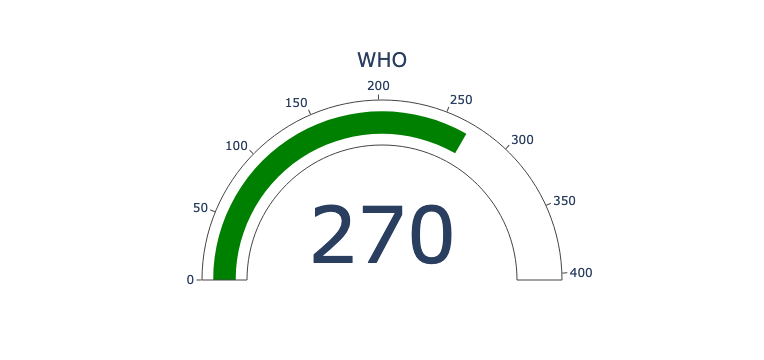

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [213]:
feature_rangetuple (min, max), default=(0, 1)

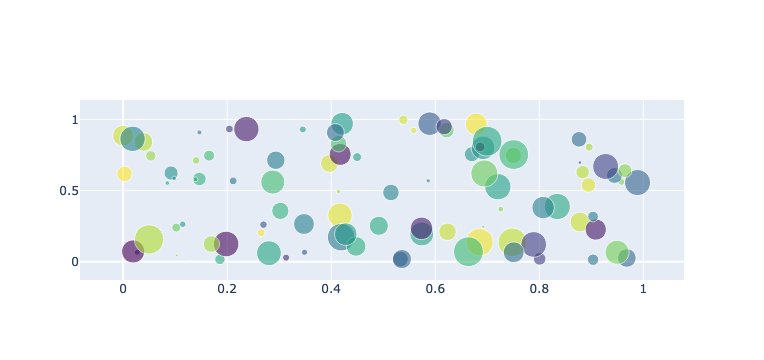

In [212]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N) * 30

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="markers",
    marker=go.scatter.Marker(
        size=sz,
        color=colors,
        opacity=0.6,
        colorscale="Viridis"
    )
))

fig.show()

In [174]:
!ls

CNBC          UNHumanRights WHO.csv       config.py
Greenpeace    WHO           __pycache__   get_tweets.py


In [176]:
#MAKE IT TO A FUNCTION!

#generalizee
#path to textfiles need to be created in the function
#name the function
def sentiment_checker():
   
        # open and write into a new csv file
        with open('{}.csv', mode='w') as csvFile:         #!!!
            fieldnames = ['File_Name', 'Tweet', 'All_Scores', 'Compound_Score', 'Sentiment']
            writer = csv.DictWriter(csvFile, fieldnames = fieldnames)
            writer.writeheader()

            #Sentiments for each tweet
            analyzer = SentimentIntensityAnalyzer()
            pred_WHO = []
            for t in tweets_{i}:                           #tweets_* is a list of all the text files in the WHO folder (=tweets)
                f = open(t, mode='r')
                result = f.read()                          #change to string
                f.close()
                vs = analyzer.polarity_scores(result)      #vs is dictionary --> get single values
                comp_score = list(vs.values())[3]          #parsee the third value of dictionary as composite score


                pred_WHO.append(str(vs))


                #print into CSV file
                writer.writerow({'File_Name': t, 'Tweet': result, 'All_Scores': str(vs), 'Compound_Score': comp_score})

        csvFile.close()    